# Projet de Machine Learning

On s'intéresse au jeu de données 'Global data on sustainable energy' et plus précisément aux données liées au "Value_co2_emissions_kt_by_country"

On commence par importer les librairies nécessaires au projet ainsi que le jeu de données :

# Importation et visualisation du jeu de données 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000.0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003.0,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004.0,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


On affiche les types des différentes variables, puis on transfome la variable 'Year' en variable qualitative. Aussi, on trouve intéressant de transformer le nom des pays en variable qualitative (category plutôt que object).

In [2]:
data.dtypes

Entity                                                               object
Year                                                                float64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [3]:
data["Year"]=pd.Categorical(data["Year"],ordered=False)
data["Entity"]=pd.Categorical(data["Entity"],ordered=False)
data.dtypes

Entity                                                              category
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

On met en forme les variables du dataset, par exemple dans la densité, certaines variables ont des ',' pour représenter des milliers :

In [4]:
print(data["Density(P/Km2)"][252:255])

data["Density(P/Km2)"] = data["Density(P/Km2)"].apply(lambda x : float(x.replace(',','')) if type(x)==str else x)

print(data["Density(P/Km2)"][252:255])

data.dtypes

252   NaN
253   NaN
254   NaN
Name: Density(P/Km2), dtype: float64
252   NaN
253   NaN
254   NaN
Name: Density(P/Km2), dtype: float64


Entity                                                              category
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

On va regarder le nombre de valeurs manquantes :

In [5]:
nb_data_missing = data.isna().sum()
taux_data_missing = nb_data_missing/len(data)
print(nb_data_missing)
print()
print(taux_data_missing)

Entity                                                                 0
Year                                                                 105
Access to electricity (% of population)                              115
Access to clean fuels for cooking                                    274
Renewable-electricity-generating-capacity-per-capita                1015
Financial flows to developing countries (US $)                      2120
Renewable energy share in the total final energy consumption (%)     294
Electricity from fossil fuels (TWh)                                  126
Electricity from nuclear (TWh)                                       231
Electricity from renewables (TWh)                                    126
Low-carbon electricity (% electricity)                               147
Primary energy consumption per capita (kWh/person)                   105
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          307
Value_co2_emissions_kt_by_country                  

On obtient bien que les variables "Renewable-electricity-generating-capacity-per-capita", "Financial flows to developing countries (US $)"et "Renewables (% equivalent primary energy)" comportent le plus de variables manquantes.

In [6]:
data = data.drop(labels=["Renewable-electricity-generating-capacity-per-capita",
                  "Financial flows to developing countries (US $)",
                  "Renewables (% equivalent primary energy)"],
          axis='columns')

data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000.0,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003.0,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004.0,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


On crée un nouveau jeu de données, qui ne comportent pas les trois colonnes précédentes et on supprime également toutes les lignes qui comportent des données manquantes.

On obtient alors un dataframe avec 2868 observations (lignes)

In [7]:
data = data.dropna()
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
3,Afghanistan,2003.0,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004.0,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005.0,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006.0,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007.0,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


# Analyse élémentaire : Statistiques unidimensionnels

On étudie ici les variables sous la forme d'histogrammes, de boxplot et on observe différentes transformations des données pour optimiser leurs affichages.

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import numpy as np


means = data.mean(numeric_only=True)
means.head()

data.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000,2768.000000
mean,76.073921,61.529949,36.757973,78.706019,15.891102,27.555329,41.006385,24345.167562,5.468888,1.740413e+05,3.846607,12365.151752,127.760116,6.808566e+05,18.143711,11.037845
std,31.767362,39.256953,29.955577,380.954100,80.131992,109.449341,34.283580,34533.783236,3.590403,8.321897e+05,4.646305,18764.236801,136.769059,1.731288e+06,25.240660,65.568731
min,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,51.633116,21.700000,9.927500,0.280000,0.000000,0.120000,7.833861,2752.572175,3.350000,2.190000e+03,1.713263,1191.959749,30.000000,3.612500e+04,1.650801,-11.779889
50%,96.757080,79.725000,29.820000,2.970000,0.000000,1.930000,37.312574,11555.610500,4.465000,1.018000e+04,3.730610,4099.705847,81.000000,1.471810e+05,15.870032,17.873887
75%,100.000000,100.000000,61.965000,24.870000,0.000000,10.912500,68.643873,30163.321500,6.160000,6.008000e+04,5.900678,14104.523310,153.000000,5.053700e+05,40.069099,42.776031
max,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,668.000000,9.984670e+06,64.963051,178.065032


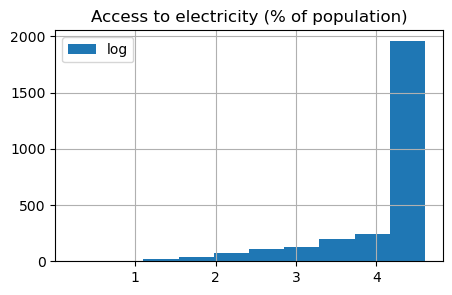

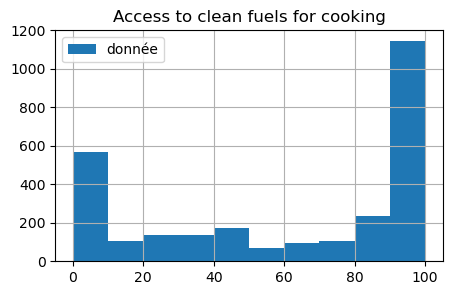

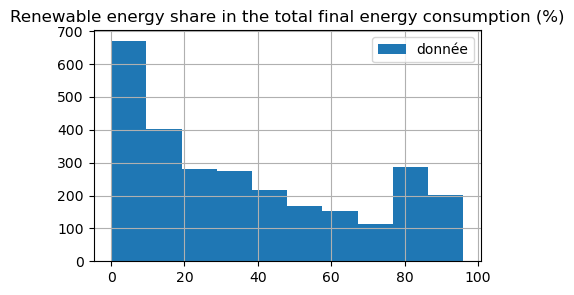

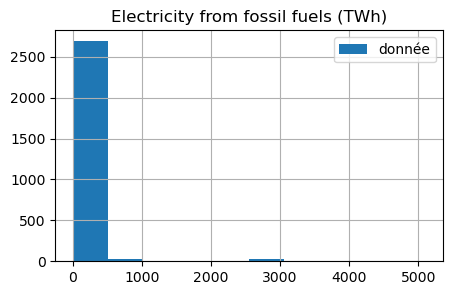

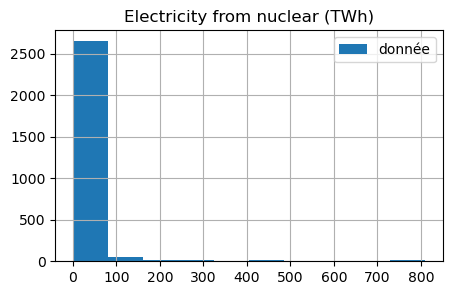

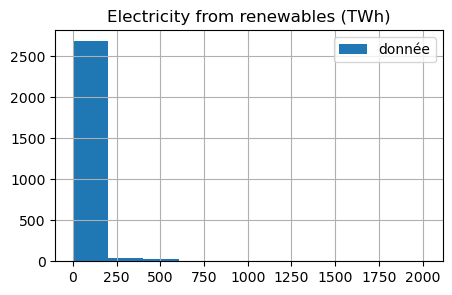

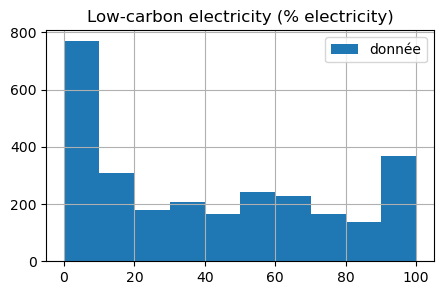

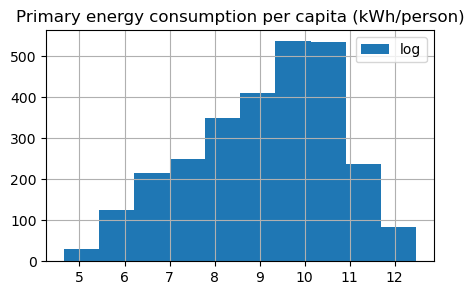

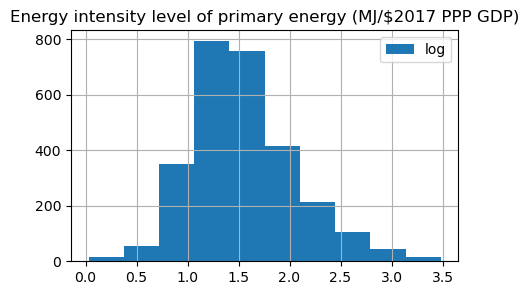

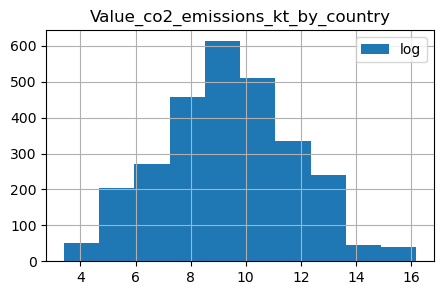

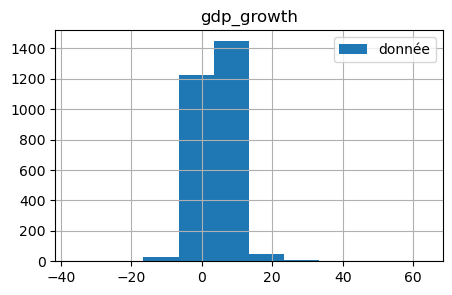

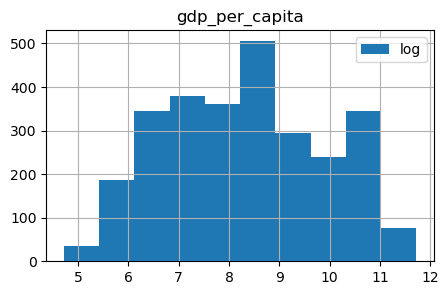

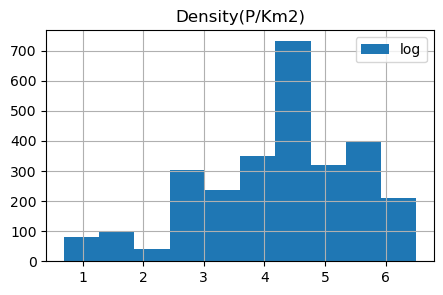

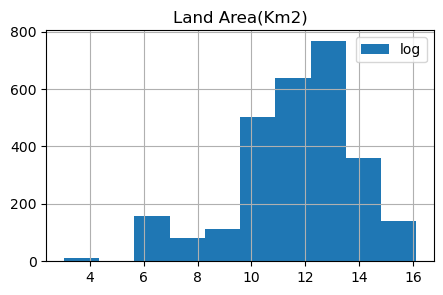

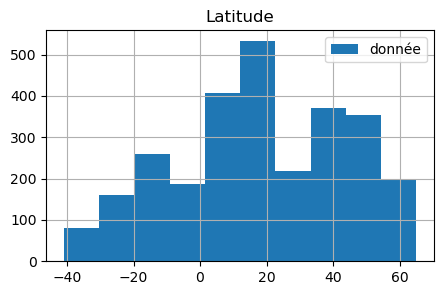

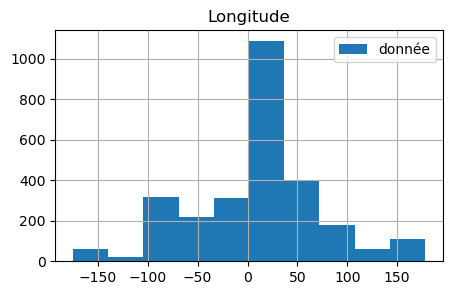

In [10]:
interesting_columns = [col for col in data.columns if col not in ['Entity', 'Year']]

for column_to_test in interesting_columns :
    plt.figure(figsize=(5,3))
    plt.title(column_to_test)
    if min(data[column_to_test]) <= 0 :
        data[column_to_test].hist(label='donnée')
    else :
        np.log(data[column_to_test]).hist(label='log')
    plt.legend()
    plt.show()
    
#idée à garder : faire des dépassements de seuils

On affiche également les statistiques descriptives des données pour avoir une idée des moyennes, médiane et quantile. Cela peut notamment nous aider pour savoir vers quelles transformations , il est préférable d'aller .
//A mettre avant les histogrammes

boxplot à faire 

['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita', 'Density(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


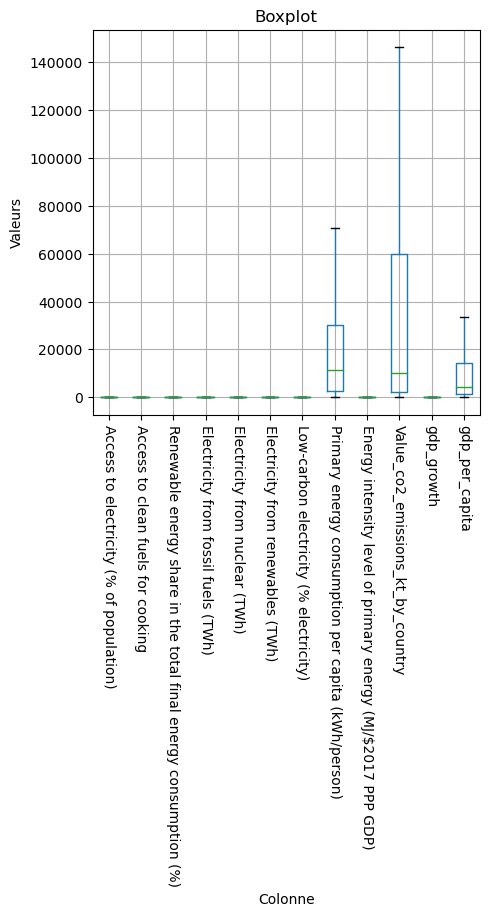

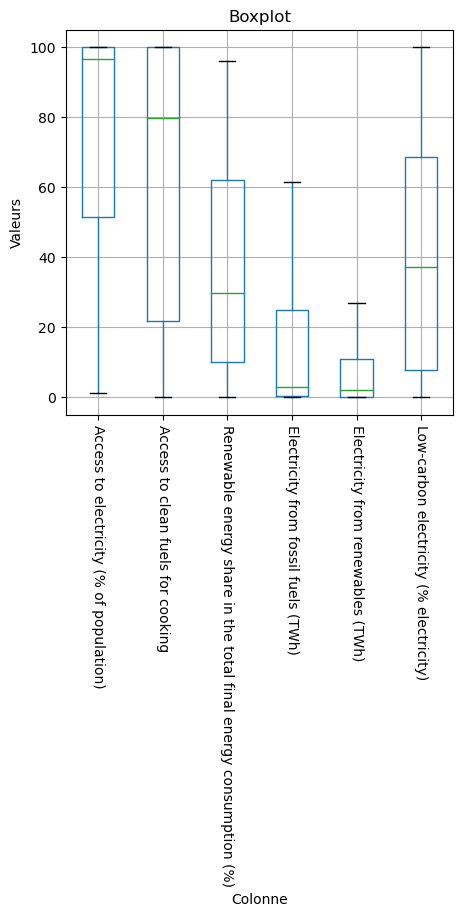

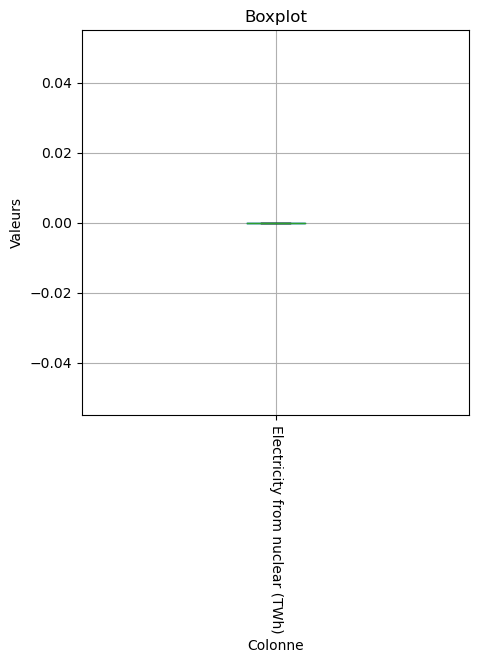

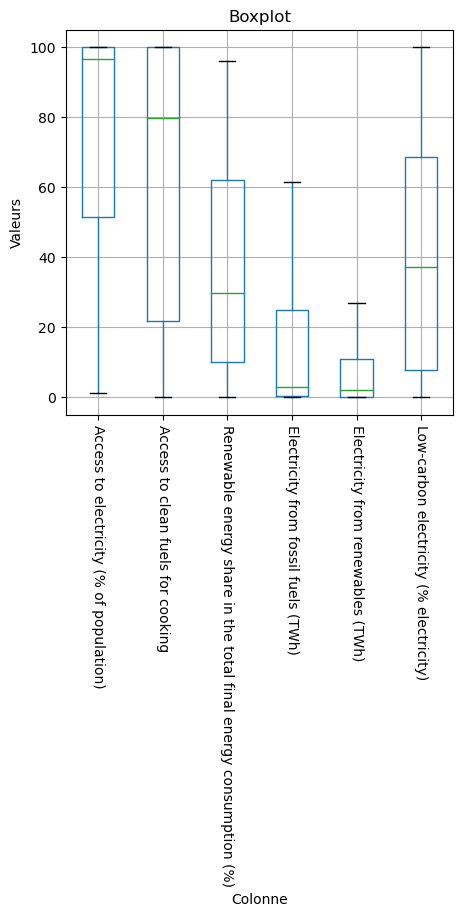

In [11]:
interesting_columns = ["Access to electricity (% of population)",
                       "Access to clean fuels for cooking",
                       "Renewable energy share in the total final energy consumption (%)",
                       "Electricity from fossil fuels (TWh)",
                       "Electricity from nuclear (TWh)",
                       "Electricity from renewables (TWh)",
                       "Low-carbon electricity (% electricity)",
                       "Primary energy consumption per capita (kWh/person)",
                       "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
                       "Value_co2_emissions_kt_by_country",
                       "gdp_growth",
                       "gdp_per_capita"]

interesting_columns2 = [col for col in data.columns if col not in ['Entity', 'Year']]

print(interesting_columns2)
"""
for column in interesting_columns:
    plt.figure(figsize=(3,3))
    plt.boxplot(data[column],showfliers=False)
    plt.title(f'Boxplot de la colonne {column}')
    plt.xlabel('Colonne')
    plt.ylabel('Valeurs')
    plt.show()"""

plt.figure(figsize=(5,5))
data.boxplot(interesting_columns,showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

plt.figure(figsize=(5,5))
data.boxplot(interesting_columns[:4]+interesting_columns[5:7]+interesting_columns[8:8]+interesting_columns[10:10],showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

plt.figure(figsize=(5,5))
data.boxplot(interesting_columns[4],showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

plt.figure(figsize=(5,5))
#data.boxplot(interesting_columns[7:7]+interesting_columns[9:9]+interesting_columns[11:11],showfliers=False)
data.boxplot(interesting_columns[:4]+interesting_columns[5:7]+interesting_columns[8:8]+interesting_columns[10:10],showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

In [12]:
emissions_par_pays = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().sort_values(ascending=False)
print(emissions_par_pays)

emissions_par_pays = emissions_par_pays.reset_index() #passer d'une série à uin dataframe

top_5_emission = emissions_par_pays["Entity"][:5]
print(top_5_emission)

Entity
China                                                                                                                                1.527328e+08
United States                                                                                                                        1.065908e+08
India                                                                                                                                3.267958e+07
Japan                                                                                                                                2.367469e+07
Germany                                                                                                                              1.547289e+07
                                                                                                                                         ...     
Malta,2014,100,100,,,4.48,2.17,0,0.08,3.5555556,59933.56,2.01,2359.999895,,7.633538112,26754.26845,"1,38",316,35.9374

### Exploration multidimensionnelle

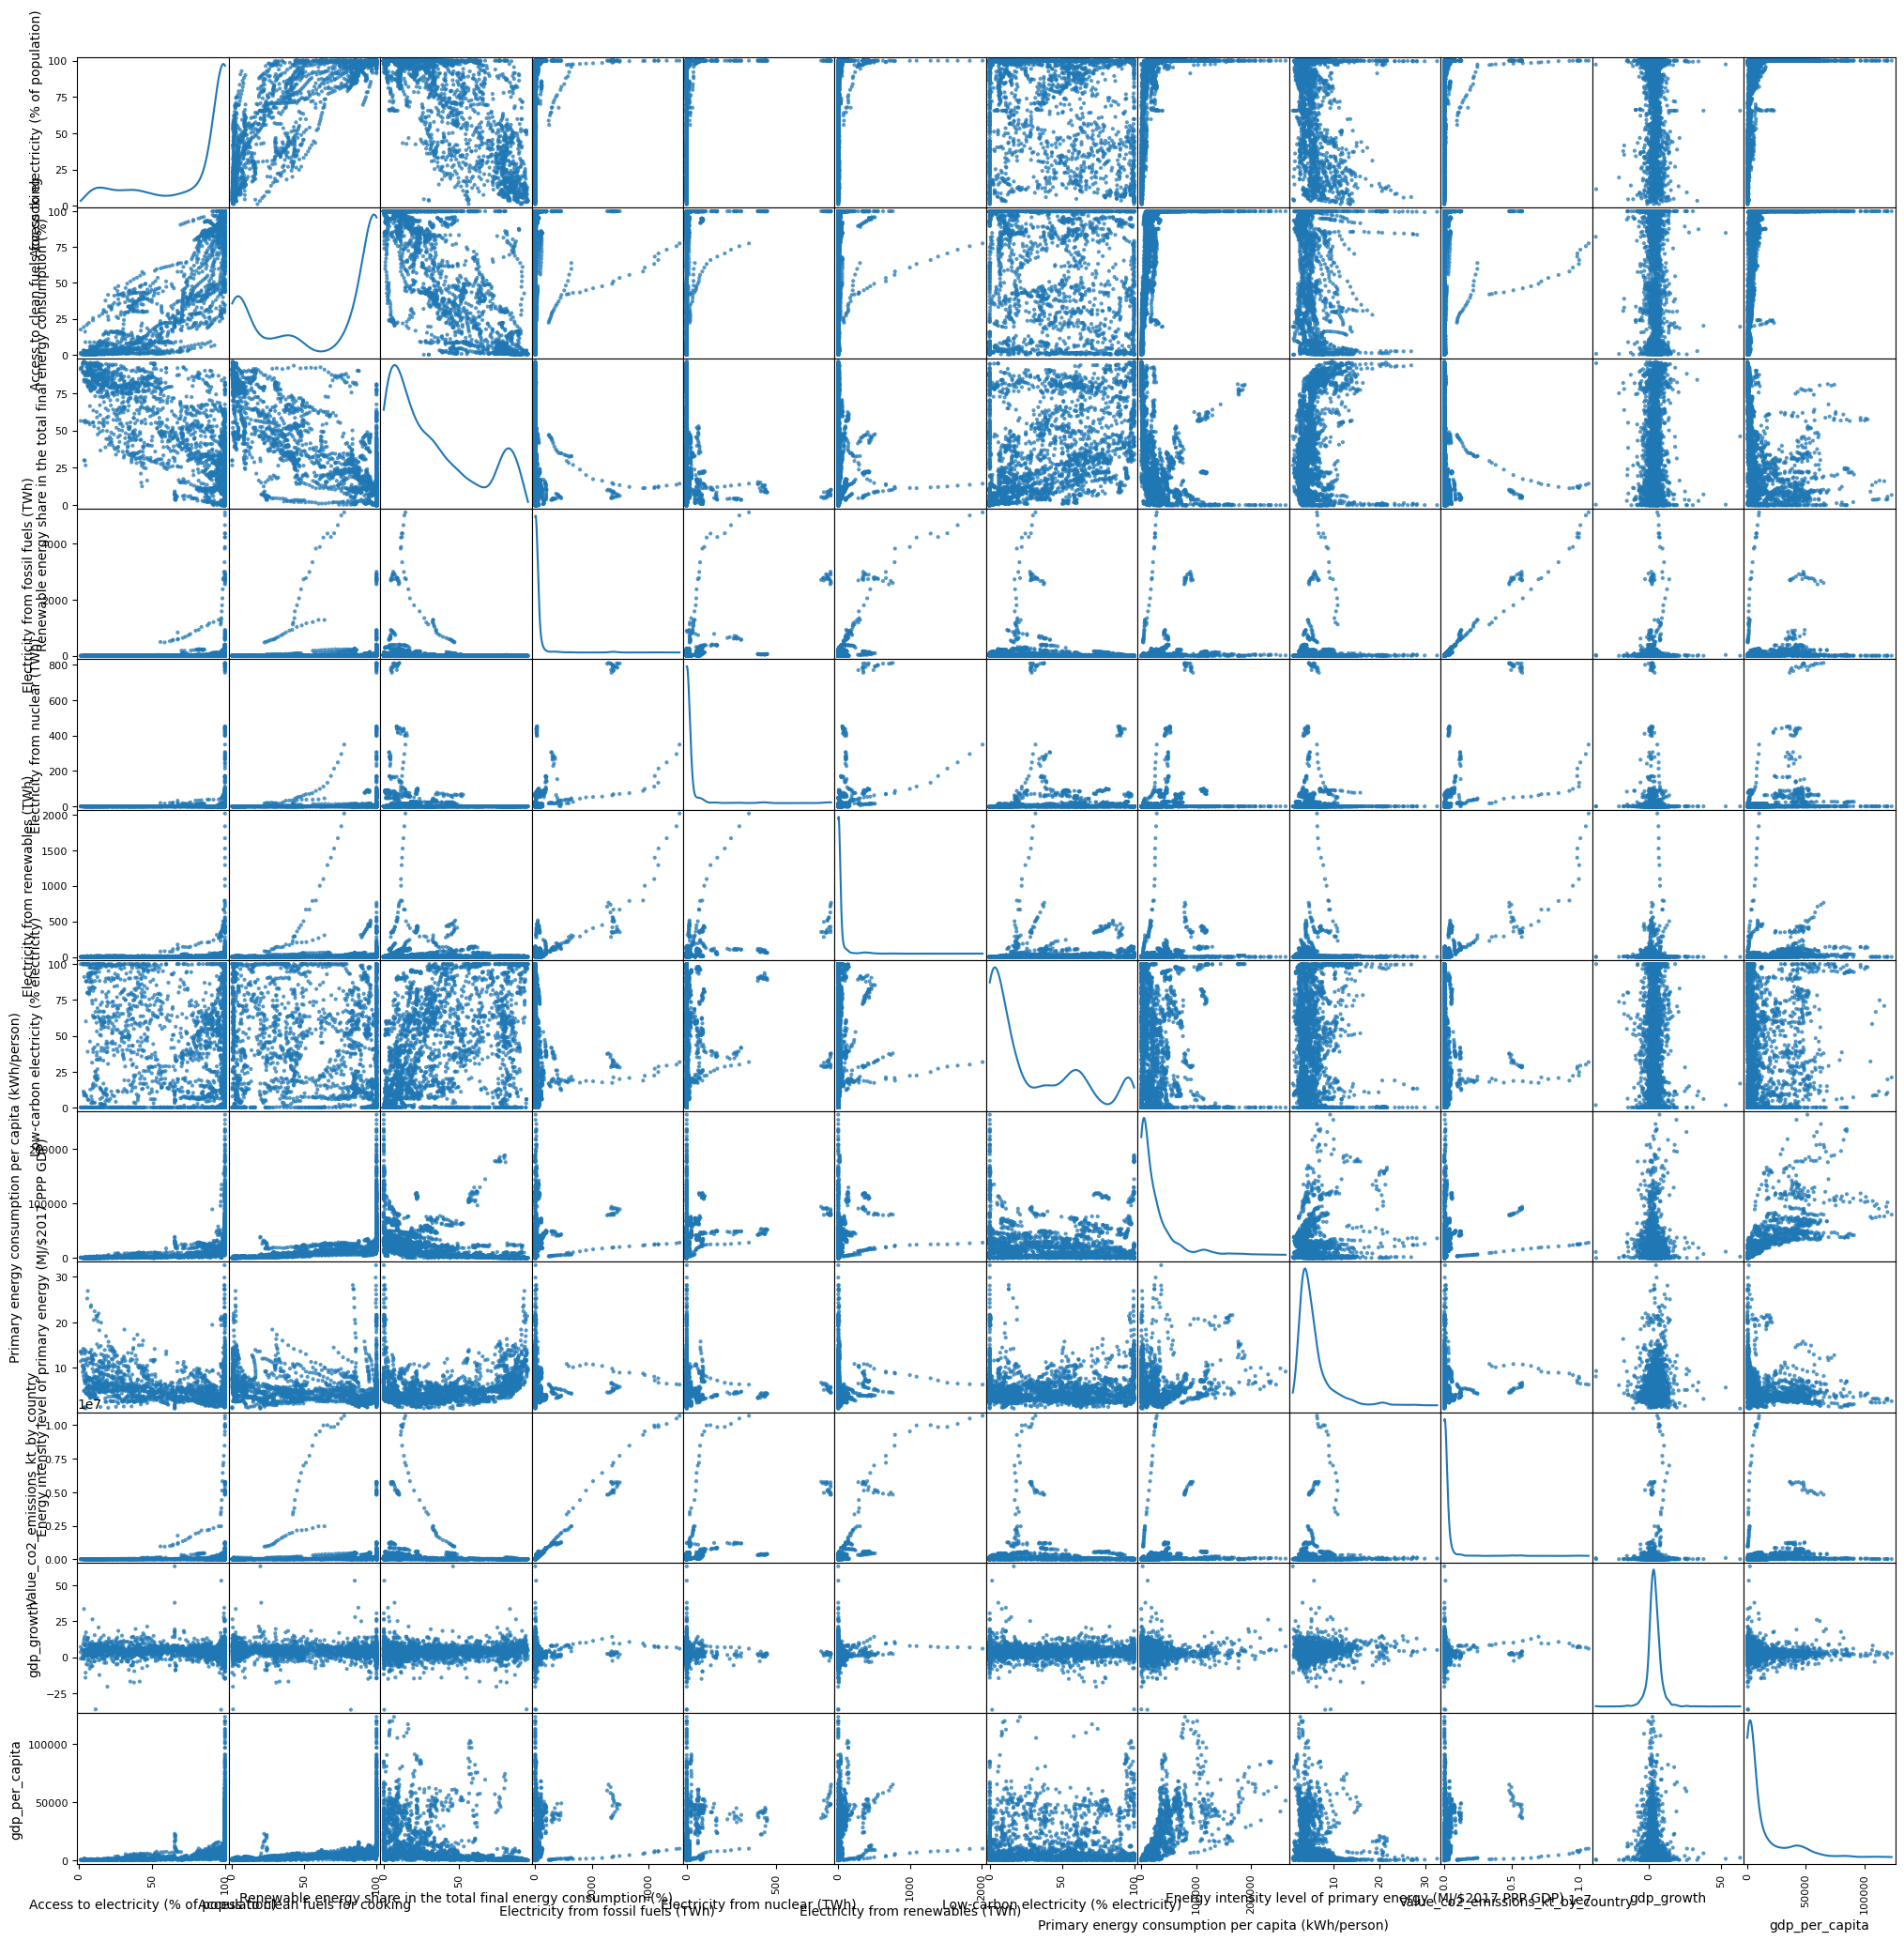

In [13]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix


scatter_matrix(data[interesting_columns], alpha=0.75, 
               figsize=(25, 25), diagonal='kde')
plt.show()

On étudie la corrélation entre les variables en calculant la matrice de corrélation.

In [14]:
data_quantitative = data.select_dtypes(include=['number'])

#print(data_quantitative)
# Calcul de la matrice de corrélation
corr_matrix = data_quantitative.corr()

corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(3) #Affiche la matrice de corrélation et ne garde que 3 chiffres après la virgule

C:\Users\eleal\AppData\Local\Temp\ipykernel_6508\1255704244.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(3) #Affiche la matrice de corrélation et ne garde que 3 chiffres après la virgule


,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
Access to electricity (% of population),1.000,0.873,-0.782,0.138,0.147,0.164,-0.146,0.466,-0.264,0.138,-0.113,0.440,0.076,0.085,0.458,-0.147
Access to clean fuels for cooking,0.873,1.000,-0.793,0.107,0.179,0.142,-0.123,0.563,-0.201,0.099,-0.157,0.551,0.033,0.092,0.466,-0.138
Renewable energy share in the total final energy consumption (%),-0.782,-0.793,1.000,-0.161,-0.169,-0.104,0.457,-0.421,0.238,-0.154,0.097,-0.364,-0.121,-0.082,-0.360,0.070
Electricity from fossil fuels (TWh),0.138,0.107,-0.161,1.000,0.645,0.840,-0.084,0.122,0.030,0.990,0.024,0.135,0.044,0.636,0.120,0.044
Electricity from nuclear (TWh),0.147,0.179,-0.169,0.645,1.000,0.483,0.056,0.211,-0.017,0.597,-0.069,0.272,-0.012,0.469,0.186,-0.091
Electricity from renewables (TWh),0.164,0.142,-0.104,0.840,0.483,1.000,0.076,0.156,0.004,0.857,0.001,0.177,-0.026,0.732,0.125,-0.018
Low-carbon electricity (% electricity),-0.146,-0.123,0.457,-0.084,0.056,0.076,1.000,-0.081,0.042,-0.069,-0.016,0.041,-0.208,0.031,-0.074,-0.024
Primary energy consumption per capita (kWh/person),0.466,0.563,-0.421,0.122,0.211,0.156,-0.081,1.000,0.140,0.113,-0.056,0.729,0.047,0.148,0.385,0.013
Energy intensity level of primary energy (MJ/$2017 PPP GDP),-0.264,-0.201,0.238,0.030,-0.017,0.004,0.042,0.140,1.000,0.042,0.124,-0.165,-0.109,0.059,-0.017,0.138
Value_co2_emissions_kt_by_country,0.138,0.099,-0.154,0.990,0.597,0.857,-0.069,0.113,0.042,1.000,0.037,0.116,0.033,0.657,0.121,0.047


Analyse des corrélations : on voit une forte corrélation entre la variable "Value_co2_emissions_kt_by_country" et "Electricity from fossil fuels (TWh)"

# Analyse en composantes principales des variables quantitatives 

Tout d'abord on peut s'intéresser s'il faut ou non standardiser les données avant de faire l'analyse en composantes principales. 

Pour cela nous affichons les différents boxplots des variables quantitatives sur la même échelle : 

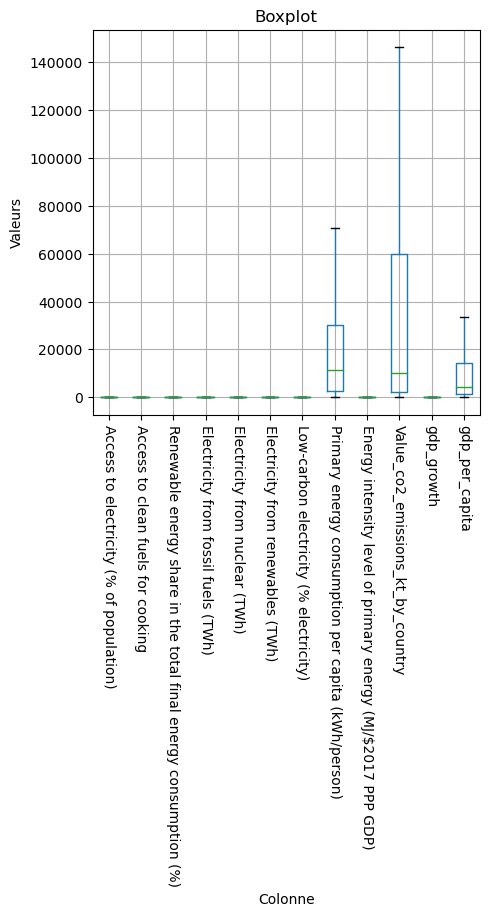

In [15]:
plt.figure(figsize=(5,5))
data.boxplot(interesting_columns,showfliers=False)
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()

On observe facilement que toutes les variables ne possèdent pas la même échelle, il est donc intéressant de standardiser les données 

# Standardisation des données

In [16]:
from sklearn.preprocessing import StandardScaler

# Supposons que votre DataFrame s'appelle df et que les colonnes qualitatives sont 'col_qualitative_1' et 'col_qualitative_2'
# et les colonnes quantitatives sont le reste

# Sélectionner les colonnes quantitatives
colonnes_quantitatives = [col for col in data.columns if col not in ['Entity', 'Year']]

# Créer un nouvel DataFrame avec seulement les colonnes quantitatives
data_quantitatif = data[colonnes_quantitatives]

# Standardiser les données quantitatives
scaler = StandardScaler()
data_quantitatif_standardise = scaler.fit_transform(data_quantitatif)

# Créer un nouveau DataFrame avec les données standardisées et seulement les variables quantitatives!
data_standardise = pd.DataFrame(data_quantitatif_standardise, columns=colonnes_quantitatives)


# Concaténer les colonnes qualitatives avec les données standardisées
#df_final = pd.concat([df[['col_qualitative_1', 'col_qualitative_2']], df_standardise], axis=1)

# Afficher le DataFrame final avec les variables standardisées pour les colonnes quantitatives
#print(df_final)


<Figure size 640x480 with 0 Axes>

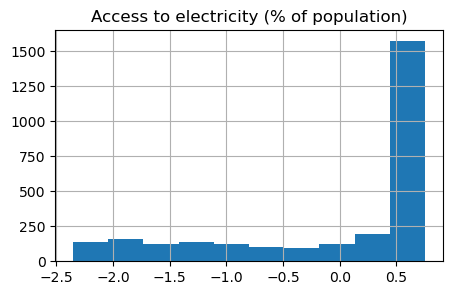

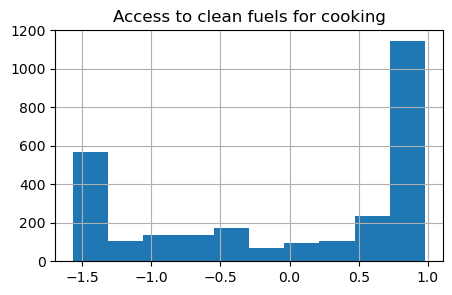

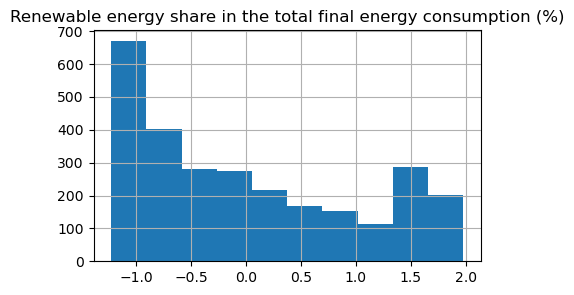

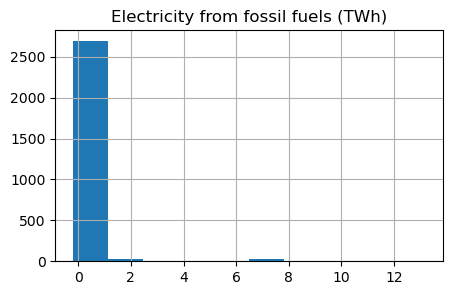

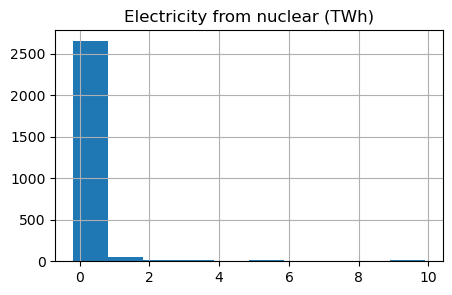

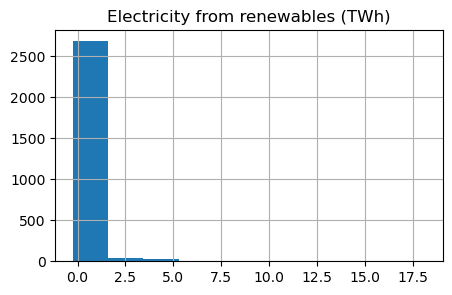

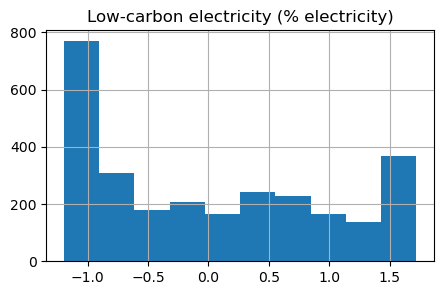

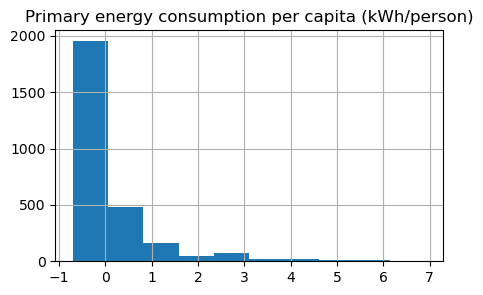

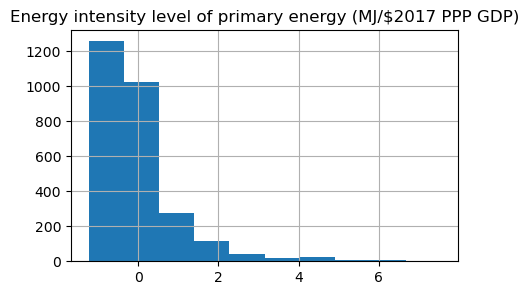

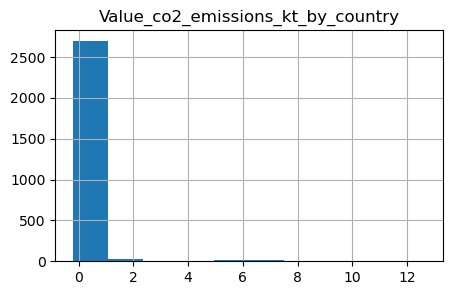

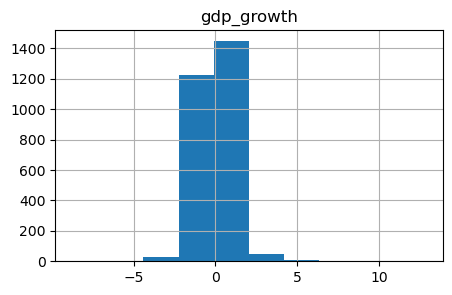

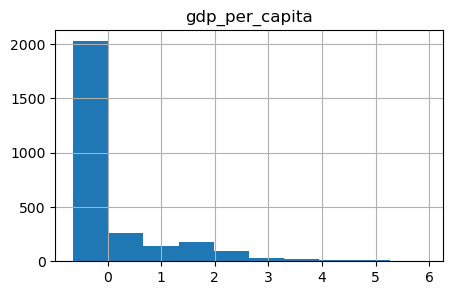

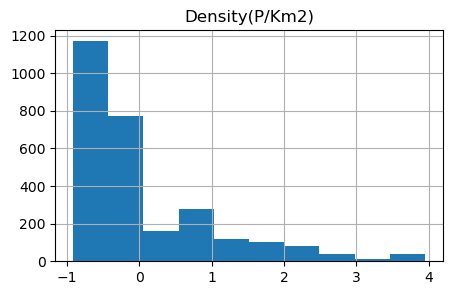

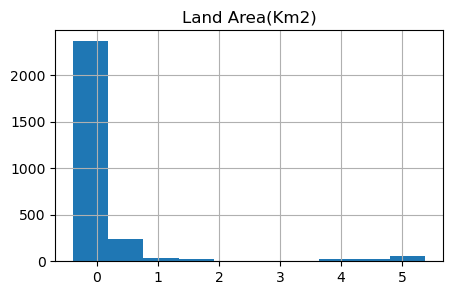

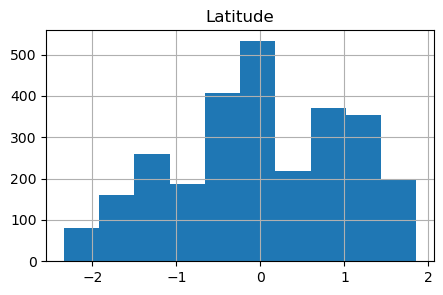

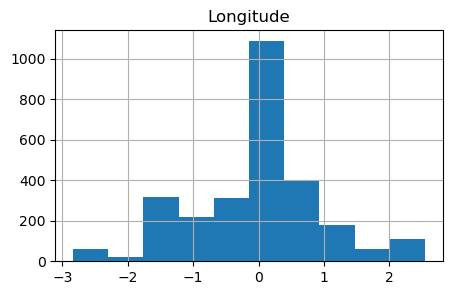

In [17]:
#juste pour tester si diff
plt.figure()

for col in colonnes_quantitatives :
    plt.figure(figsize=(5,3))
    plt.title(col)
   # if min(data[column_to_test]) <= 0 :
    data_standardise[col].hist(label='donnée')
        


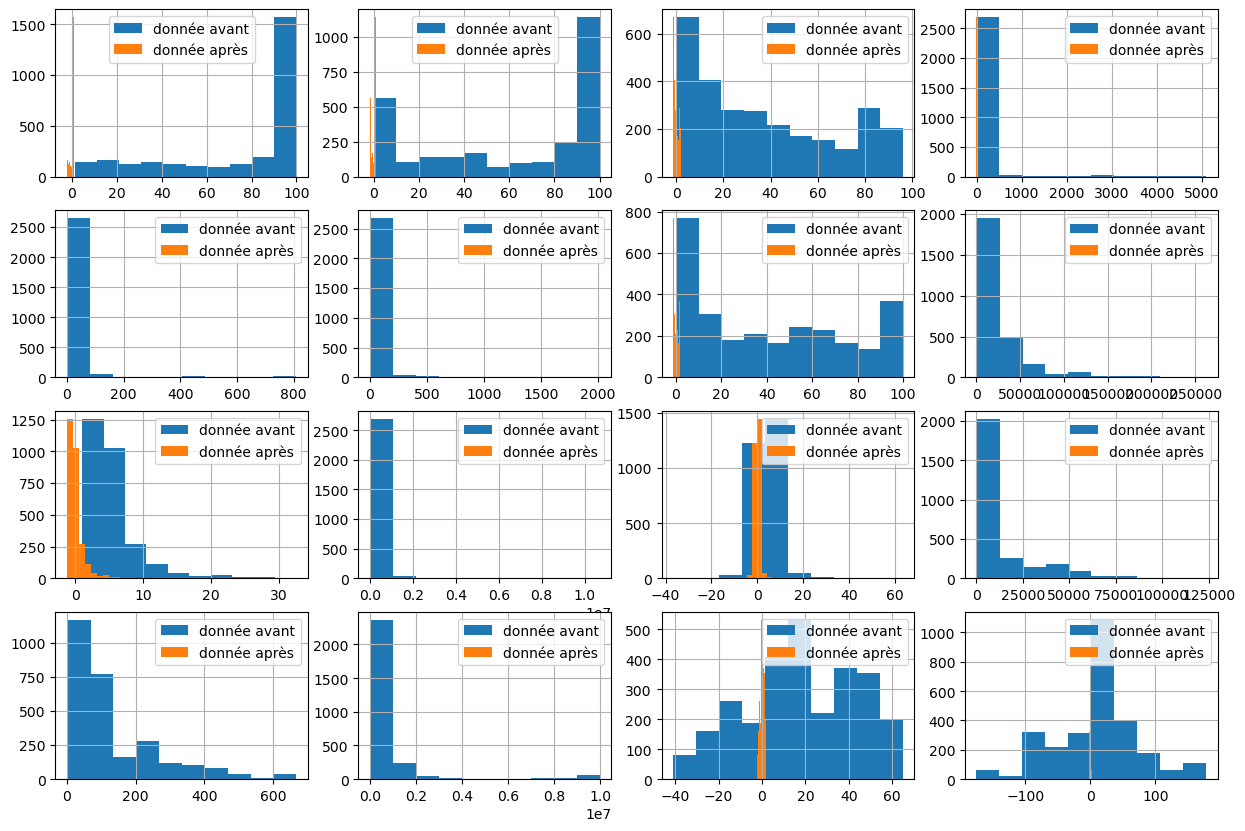

In [18]:
#je veux afficher sur le meme histogramme les valeurs normales & apres standardisation
num_cols = len(colonnes_quantitatives)

plt.figure(figsize=(15,10))

# Créer une figure pour les histogrammes
for i, col in enumerate(colonnes_quantitatives):
    # Histogramme avant standardisation
    plt.subplot(4, 4, i+1)
    data[col].hist(label='donnée avant')
    #plt.title(col)
    
    # Histogramme après standardisation
    data_standardise[col].hist(label='donnée après')
    #print(data_standardise[col])
    plt.legend()
# Ajuster la disposition des sous-graphiques
#plt.tight_layout()

# Afficher le graphique
plt.show()


### PCA 

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns


On affiche une courbe qui nous permet d'obtenir le nombre de variables qui expliquent au mieux la variance, on a également le boxplot des 10 première composantes et un histogramme qui permet de représenter la proportion que chaque composante de l'ACP représente. 


on garde 8 composants pour le PCA


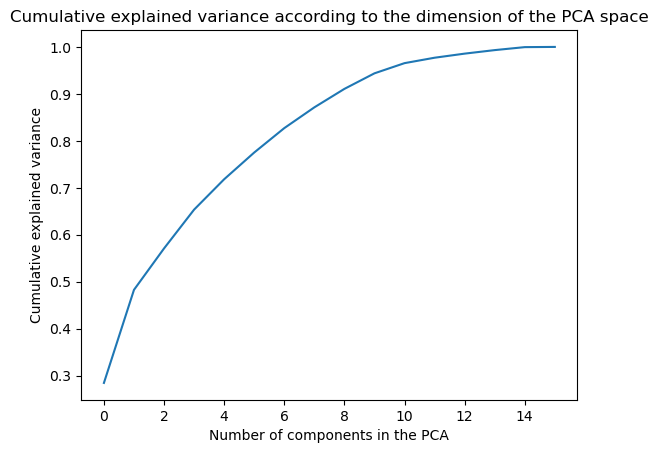

In [20]:
pca = PCA()
data_pca = pca.fit_transform(data_standardise)


plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca = PCA(0.85).fit(data_standardise) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca.n_components_} composants pour le PCA")

In [21]:
pca = PCA(n_components=8)

data_pca = pca.fit_transform(data_standardise) #même chose que fit puis transform dans notre cas à nous

print(100*pca.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', data_standardise.shape)
print('Dimension after projection:', data_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% of the total variance')
print('Component 3:', round(pca.explained_variance_[2],2), 'i.e.', round(100*pca.explained_variance_ratio_[2],2), '% of the total variance')

[28.44763774 19.8224723   8.82031711  8.26384469  6.46516896  5.6935959
  5.19644201  4.4234574 ]
--- PCA ---
Initial dimension: (2768, 16)
Dimension after projection: (2768, 8)

--- Explained variance ---
Component 1: 4.55 i.e. 28.45 % of the total variance
Component 2: 3.17 i.e. 19.82 % of the total variance
Component 3: 1.41 i.e. 8.82 % of the total variance


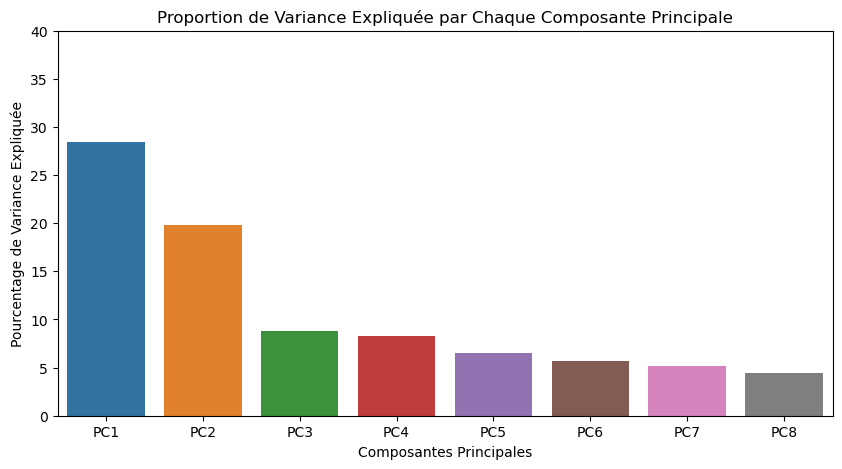

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

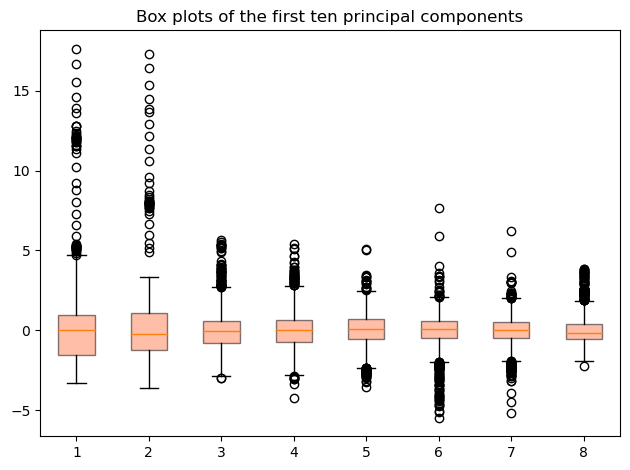

In [23]:
box = plt.boxplot(data_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

Analyse: on comprend donc que pour expliquer 85% de la variance on a besoin de 8 composantes différentes. 
La première composante explique à elle seule 28.45% de la variance. La deuxième 19.82%, 8.82% pour la troisième ect...

Ainsi l'analyse par composantes principales nous montre qu'on peut potentiellement expliquer ce jeu de données avec moins de données quantitatives (8 au lieu de 14)

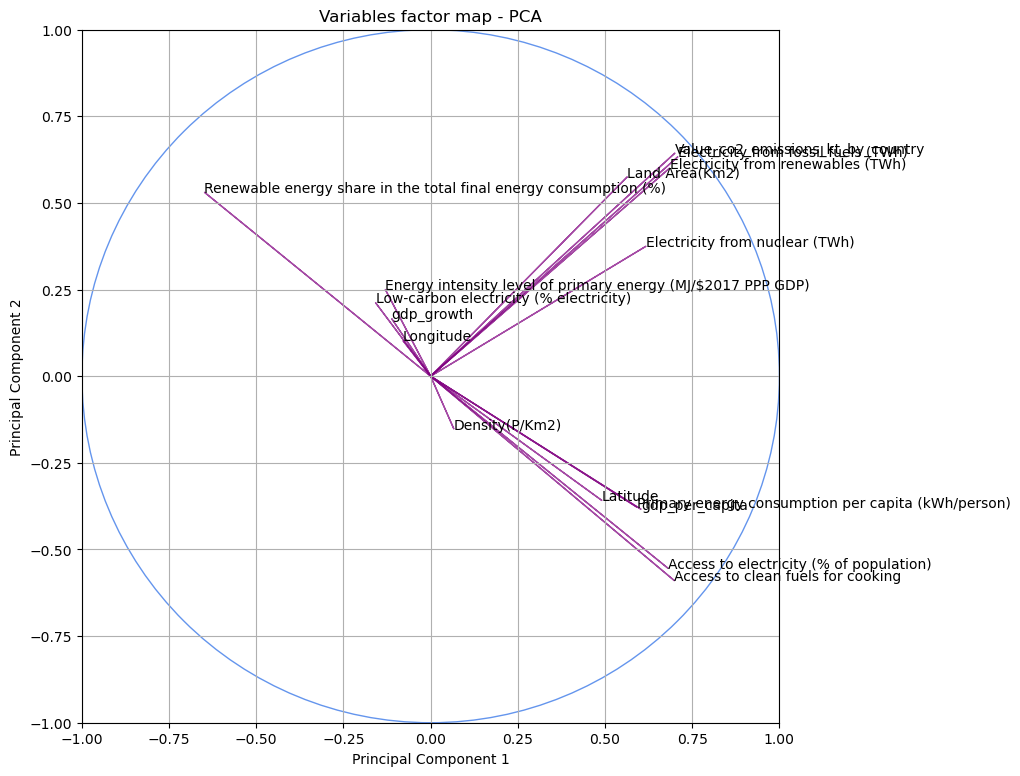

In [24]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_standardise.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

## Analyse : 
La projection dans les deux premières composantes nous permet de tirer quelques conclusions. 

Tout d'abord, on voit que la majorité des variables semblent bien projetées en effet les droites sont proches du bord du cercle, à part les variables "Density", "Longitude", "Low-carbon electricity (% electricity)" et "Energy intensity level of primary energy (MJ/$2017 PPP GDP)". 

On voit également qu'il ya une certaine corrélation entre les variables :
- "Access to electricity (% of population)" et "Access to clean fuels for cooking"

- "Electricity from renewables (TWh)", "Electricity from fossil fuels (TWh)" et "Value_co2_emissions_kt_by_country"

De plus les variables : "Renewable energy share in the total final energy consumption (%)" et "Primary energy consumption per capita (kWh/person)" sont anti-corrélées car éloignées d'un angle de 180° sur le cercle.

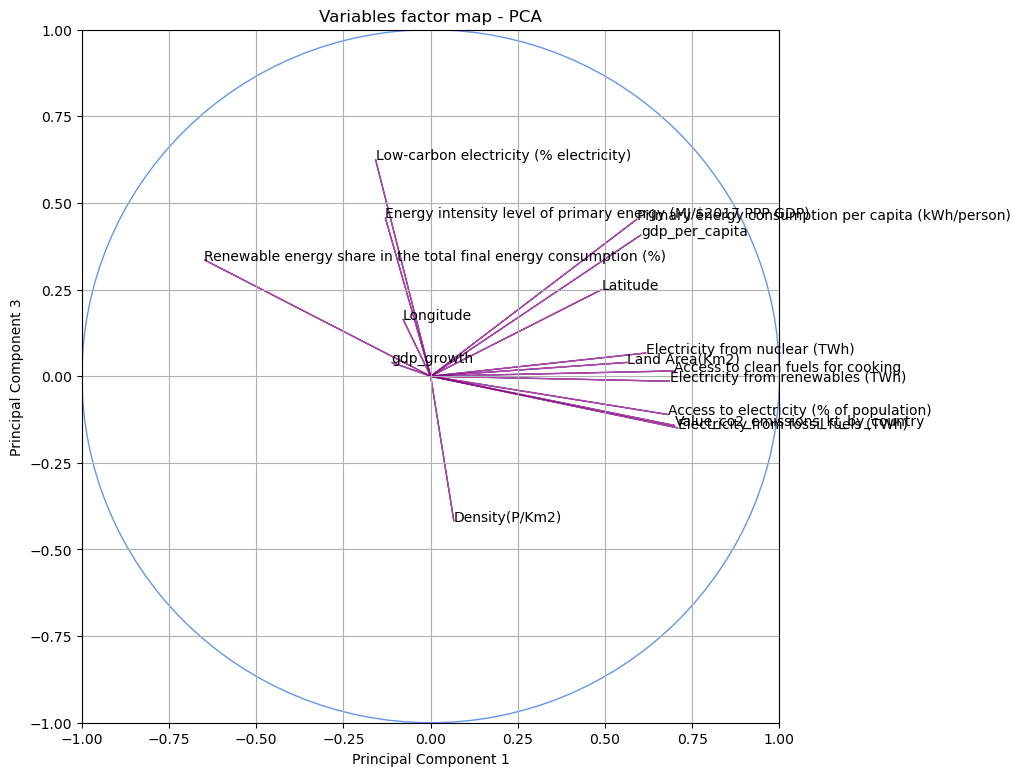

In [25]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_standardise.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

plt.grid(True)
plt.show()

En projettant les données standardisées dans le plan de la première et troisième composantes on obtient des résultats bien différents. Globalement on peut dire que les données sont moins bien projetées car éloignées du bord du cercle. 

Au niveau de corrélation :
- "Electricity from fossil fuels (TWh)" et "Value_co2_emissions_kt_by_country" sont très corrélées 

- il en est de meme pour : "Energy intensity level of primary energy" et "Low-carbon electricity " 


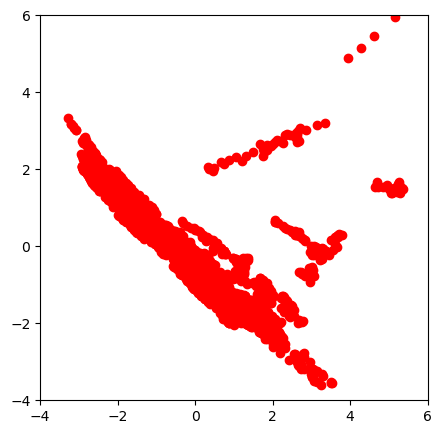

In [26]:
## Représentation des individus
plt.figure(figsize=(5,5))
for i, j, nom in zip(data_pca[:,0], data_pca[:,1], data_standardise["Value_co2_emissions_kt_by_country"]):
    color = "red" if nom  else "blue"
    plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

# A faire:
- méthode des k-means ? fait en TP mais je sais pas si c'est vrt demandé

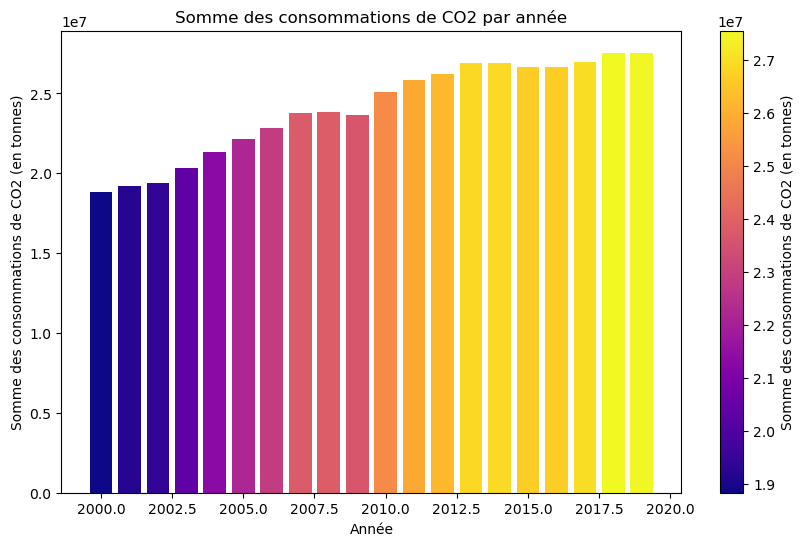

In [27]:
from matplotlib import colormaps
from matplotlib.cm import ScalarMappable

df_somme_annee = data.groupby('Year')['Value_co2_emissions_kt_by_country'].sum().reset_index()

df_somme_annee = df_somme_annee.drop(df_somme_annee.index[-1])

cmap = plt.cm.get_cmap('plasma')

# Normalisation des valeurs pour correspondre à la colormap
norm = plt.Normalize(df_somme_annee['Value_co2_emissions_kt_by_country'].min(), df_somme_annee['Value_co2_emissions_kt_by_country'].max())

plt.figure(figsize=(10, 6))
plt.bar(df_somme_annee['Year'],df_somme_annee['Value_co2_emissions_kt_by_country'],color=cmap(norm(df_somme_annee['Value_co2_emissions_kt_by_country'])))
plt.xlabel('Année')
plt.ylabel('Somme des consommations de CO2 (en tonnes)')
plt.title('Somme des consommations de CO2 par année')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Somme des consommations de CO2 (en tonnes)')

plt.show()

## Modélisation

Nous nous intéressons maintenant à la prediction de la variable quantitative "**Value-co2-emissions**" 

Nous commençons par créer deux échantillons différents; l'un sera appelé l'échantillon d'apprentissage, il nous permettra d'entraîner nos différents modèles. L'autre, l'échantillon de test, nous permettra de tester nos résultats. 

In [43]:
#il faut créer dfC par concaténation mais j'ai pas trop compris 

#cf tp pic ozone 
""""
ozoneDum=pd.get_dummies(ozone[["JOUR","STATION"]])
del ozoneDum["JOUR_0"]
ozoneQuant=ozone[["MOCAGE","TEMPE","VentMOD","VentANG","SRMH2O","LNO2","LNO"]]
dfC=pd.concat([ozoneDum,ozoneQuant],axis=1)
dfC.head()

from sklearn.model_selection import train_test_split  
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=200,random_state=11)
X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=200,random_state=11)

"""
from sklearn.model_selection import train_test_split

X = data.drop("Value_co2_emissions_kt_by_country", axis=1)
y = data['Value_co2_emissions_kt_by_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train :', len(X_train)) 
print('X_test :', len(X_test)) 
print('y_train :', len(y_train)) 
print('y_test :', len(y_test)) 


X_test.head()

X_train : 2214
X_test : 554
y_train : 2214
y_test : 554


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
1791,Kuwait,2005.0,100.00000,100.0,0.00,41.11,0.0,0.00,0.000000,149455.020,6.78,10.609045,35591.037130,240.0,17818.0,29.311660,47.481766
1159,Fiji,2004.0,80.79184,28.5,35.72,0.31,0.0,0.44,58.666668,11433.929,3.27,5.300000,3311.159895,49.0,18274.0,-17.713371,178.065032
2868,Sao Tome and Principe,2018.0,71.00000,2.7,37.85,0.08,0.0,0.01,11.111111,3149.711,3.49,2.945269,1953.513257,242.0,836.0,0.330192,6.733343
3471,United Arab Emirates,2011.0,100.00000,100.0,0.11,93.19,0.0,0.03,0.032182,119056.130,5.03,6.928509,39194.672240,118.0,83600.0,23.424076,53.847818
1273,Georgia,2012.0,100.00000,71.7,28.69,2.32,0.0,7.15,75.501580,14376.836,3.68,6.369008,4421.818242,57.0,69700.0,42.315407,43.356892


Cette étape est primordiale, en effet nous testerons donc nos modèles sur des données qui n'auront pas servi à les élaborer. (cf cours si chose à rajouter)

## Modèle de régression linéaire

pas besoin de standardiser les données avant un modèle linéaire MAIS on doit le faire pour SVM !

    - on ne doit avoir que les var quantitatives

pertinent de faire un affichage de la valeur de C02 en fonction de l'électricité issue des énergies fossiles ?? (grosse correlation)

In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


colonnes_quantitatives = [col for col in data.columns if col not in ['Entity', 'Year', 'Value_co2_emissions_kt_by_country']]

# Créer un nouvel DataFrame avec seulement les colonnes quantitatives
X_train_quanti = X_train[colonnes_quantitatives]
X_test_quanti = X_test[colonnes_quantitatives]
#y_train_quanti = y_train[colonnes_quantitatives]
#y_test_quanti = y_test[colonnes_quantitatives]


regLasso = linear_model.Lasso()
regLasso.fit(X_train_quanti,y_train)
prev=regLasso.predict(X_test_quanti)
print("MSE=",mean_squared_error(y_test,prev))

#ca fait bcp pour le MSE la non...
#le MSE représente ici le coeff de pénalisation du LASSO 

MSE= 11143809694.257334


In [45]:
from sklearn.metrics import r2_score
print("R2=",r2_score(y_test,prev))

R2= 0.9779232083161211


In [47]:
#on optimise le coeff de pénalisation par validation croisée:

from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train_quanti, y_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.985592, Meilleur paramètre = {'alpha': 0.05}


Avec la valeur optimisée d'alpha on obtient alors une autre valeur du MSE:

In [50]:
prev=regLassOpt.predict(X_test_quanti)
print("MSE=",mean_squared_error(prev,y_test))
print("R2=",r2_score(y_test,prev))


MSE= 11143809107.19174
R2= 0.9779232094791458


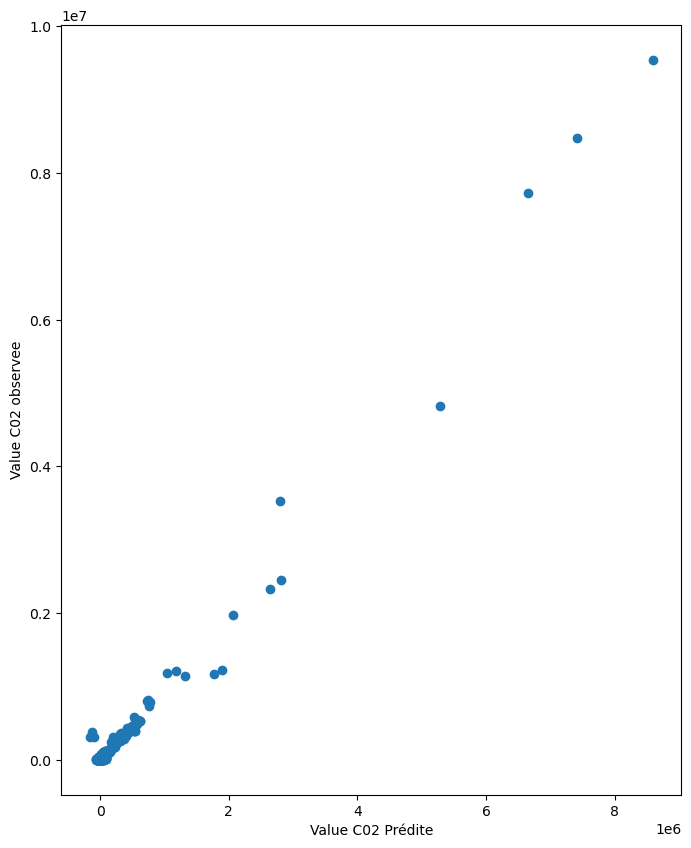

In [66]:
plt.plot(prev,y_test,"o")
plt.xlabel(u"Value C02 Prédite")
plt.ylabel("Value C02 observee")
plt.show()

#grosse différence d'ordre de grandeur entre prédites et observées???

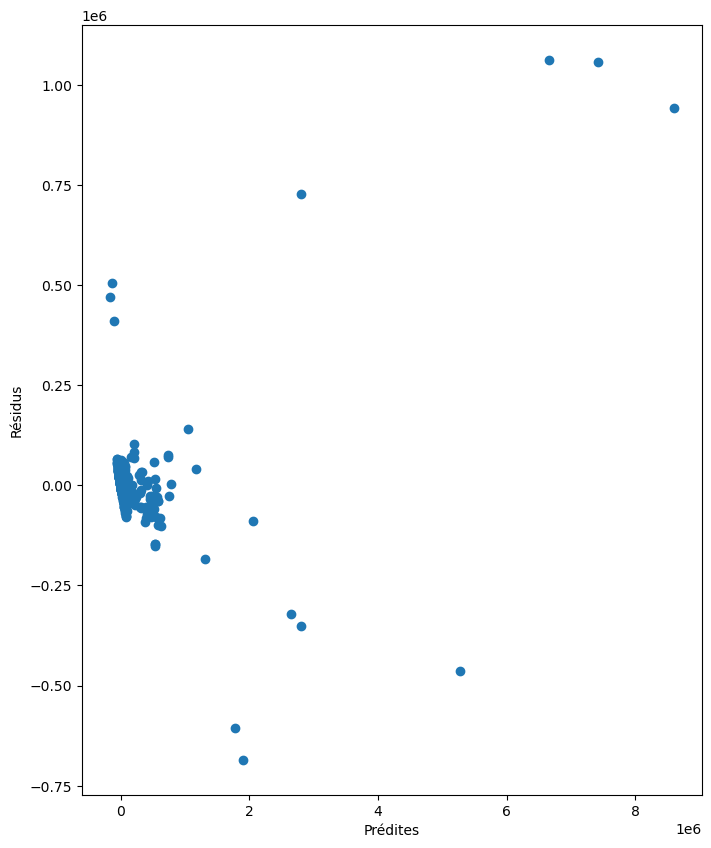

In [60]:
plt.plot(prev,y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,220)
plt.show()

#changer l'échelle

In [56]:
# Calcul des différents coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train_quanti,y_train)
model_lasso.coef_

array([ 3.25681216e+02, -6.34476838e+02, -7.82544808e+02,  2.10157853e+03,
       -6.97149050e+02,  2.95408262e+02,  6.10743593e+02, -4.62422918e-02,
        2.51977032e+03,  8.35862238e+02, -5.81299826e-01,  2.01320064e+01,
        2.10141133e-02,  6.86368300e+02, -1.43299903e+01])

In [58]:
#Observation des coefficients garder par la pénalisation Lasso dans le modèle linaire
coef = pd.Series(model_lasso.coef_, index = X_train_quanti.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

#et bien c'est pas foufou la 

Lasso conserve 15 variables et en supprime 0


Text(0.5, 1.0, 'Coefficients du modèle lasso')

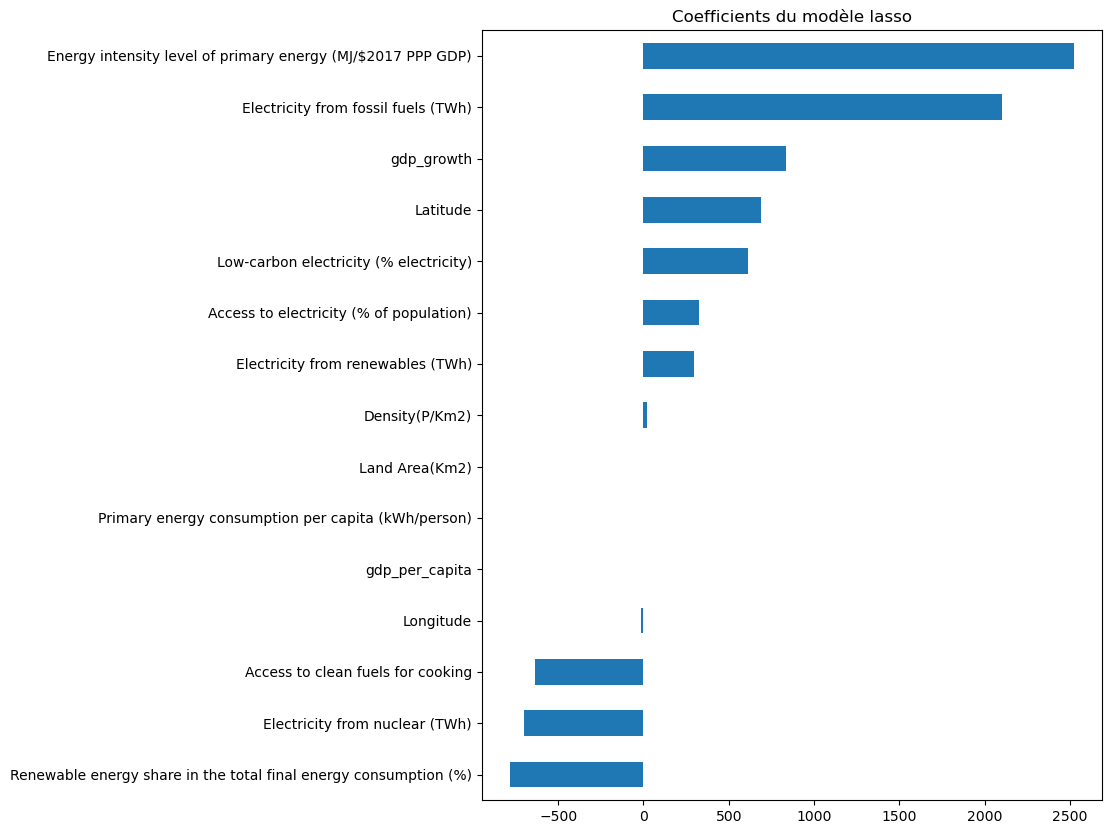

In [59]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Analyse : quelles sont les conséquences de la pénalisation LASSO? Quel est l'effet de chacune des variables sur la valeur du C02?

Comme prévu, la variable "Electricity from fossil fuels" a une grande importance dans la valeur. On pouvait le prédire avec la corrélation.

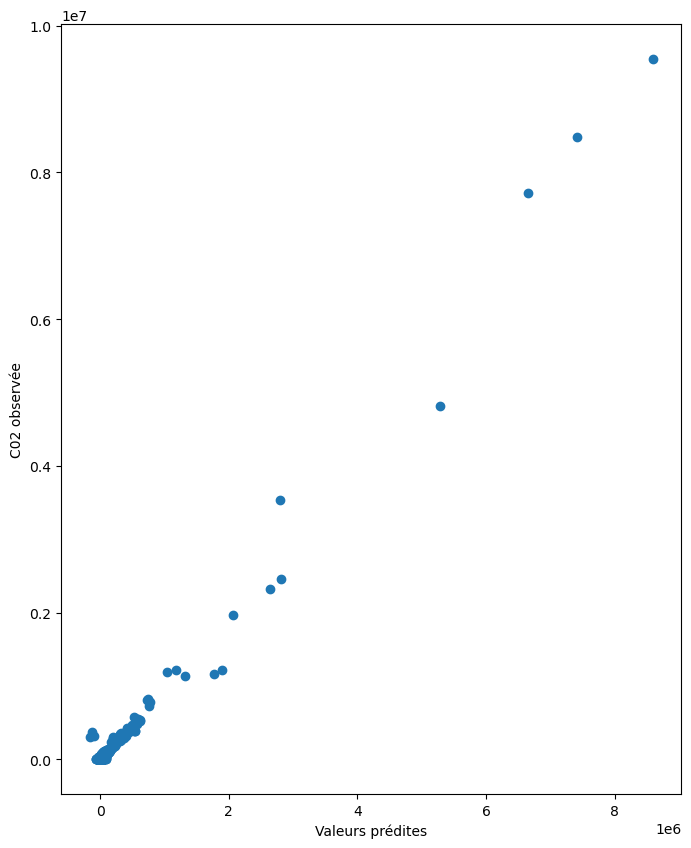

In [63]:
plt.plot(prev,y_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"C02 observée")
plt.hlines(150,50,300)
plt.vlines(150,0,300)
plt.show()

#je sais pas ce que ca change 

In [65]:
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(prev>150,y_test>150)
print(table)

#valeur à changer pour le 150 mais je sais pas trop quoi mettre vu les ordres de grandeur ??

Value_co2_emissions_kt_by_country  False  True
row_0                                         
False                                 20   492
True                                   0    42


Autre library utilisée dans la régularisation de la pénalisation LASSO : 


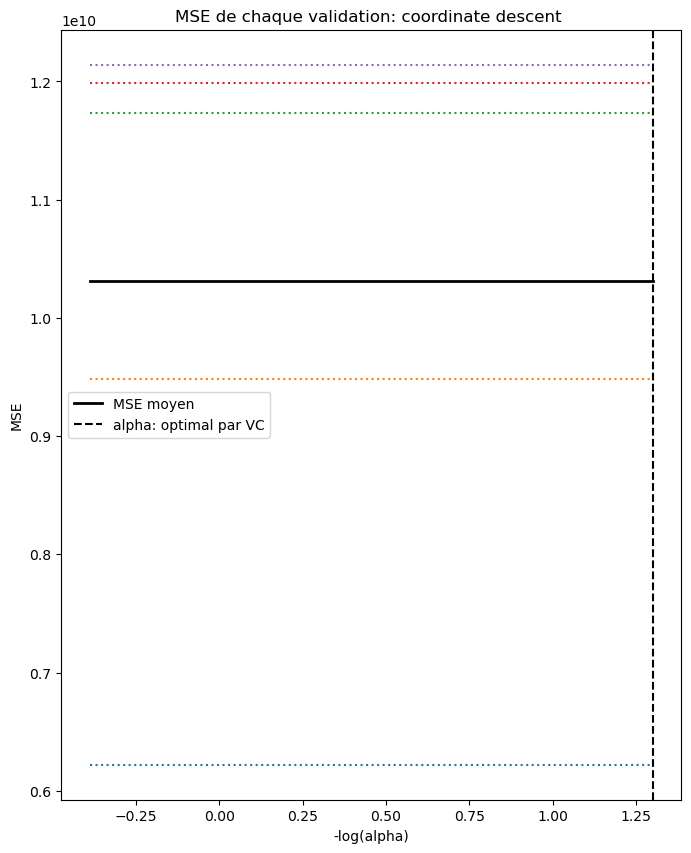

In [68]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(X_train_quanti,y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

Chemin de régularisation :

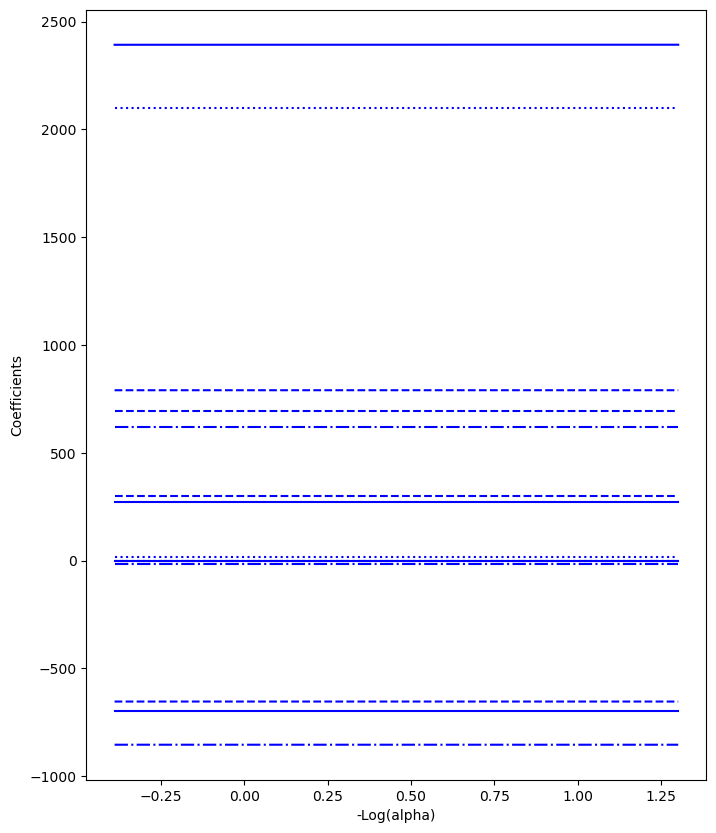

In [69]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_quanti,y_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()